In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.datasets import cifar10, mnist
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(1)

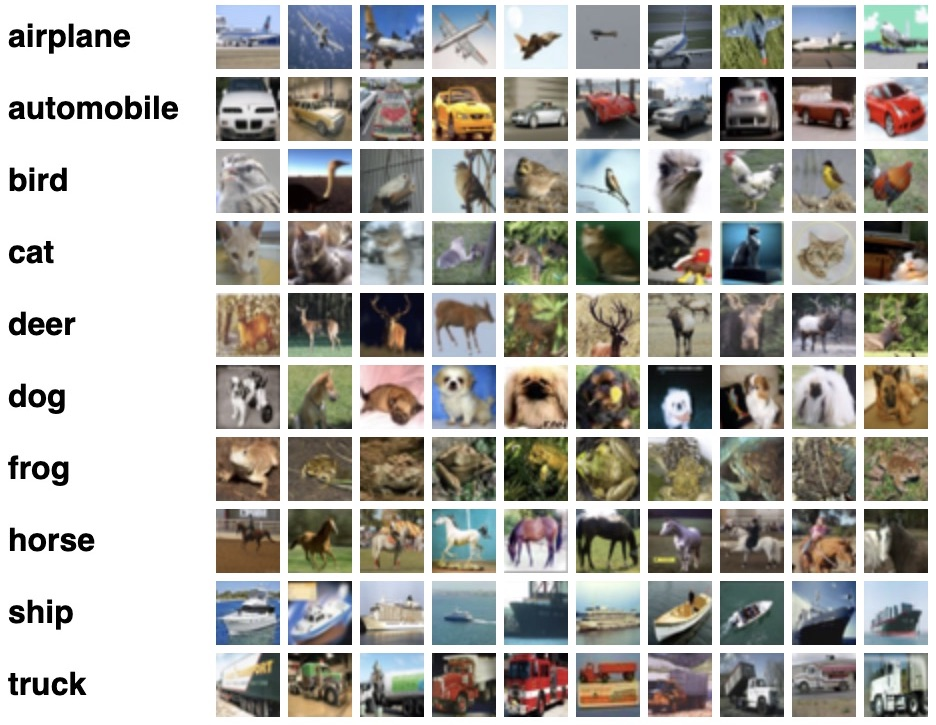

# CIFAR + Свертки

In [ ]:
#@title CIFAR пример со сверточными слоями
input = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu')(input)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output= layers.Dense(10, activation="softmax")(x)

In [ ]:
model = keras.Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0     

## Загрузка данных


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255
y_train = keras.utils.to_categorical(y_train, 10) #[0,0,1,0,0,0,0,0,0,0]
y_test = keras.utils.to_categorical(y_test, 10)

170508288/170498071 [==============================] - 14s 0us/step


## Обучение


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics="accuracy")

model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 15s 6ms/step - loss: 1.5674 - accuracy: 0.4286 - val_loss: 1.3037 - val_accuracy: 0.5423
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 1.2290 - accuracy: 0.5657 - val_loss: 1.0783 - val_accuracy: 0.6205
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 1.0925 - accuracy: 0.6135 - val_loss: 1.0403 - val_accuracy: 0.6353
Epoch 4/20
625/625 [==============================] - 3s 5ms/step - loss: 0.9980 - accuracy: 0.6492 - val_loss: 0.9378 - val_accuracy: 0.6730
Epoch 5/20
625/625 [==============================] - 3s 5ms/step - loss: 0.9236 - accuracy: 0.6755 - val_loss: 0.9118 - val_accuracy: 0.6828
Epoch 6/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8645 - accuracy: 0.6967 - val_loss: 0.8915 - val_accuracy: 0.6886
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.8100 - accuracy: 0.7149 - val_loss: 0.8573 - val_accuracy: 0.7044
Epoch

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.9898 - accuracy: 0.7216
[0.9898048043251038, 0.7215999960899353]


# Реализация Авотэнкодера для MNIST

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train_mnist = x_train_mnist.astype("float32") / 255
x_test_mnist = x_test_mnist.astype("float32") / 255
y_train_mnist = keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, 10)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
enc_input = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(enc_input)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Flatten()(x)
enc_output = layers.Dense(8, activation="linear")(x)
encoder = keras.Model(inputs=enc_input, outputs=enc_output, name="encoder")

dec_input = keras.Input(shape=(8, ), name="encoded_img")
x = layers.Dense(7* 7 * 8, activation="relu")(dec_input)
x = keras.layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation="relu", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, 5, strides=(2, 2), activation="linear", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
dec_output = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)


decoder = keras.Model(dec_input, dec_output, name="decoder")

In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_img (InputLayer)    [(None, 8)]               0         
                                                                 
 dense_5 (Dense)             (None, 392)               3528      
                                                                 
 reshape (Reshape)           (None, 7, 7, 8)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       12864     
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       5123

In [ ]:
autoencoder_input= keras.Input(shape=(28, 28, 1), name="img")
x = encoder(autoencoder_input)
autoencoder_output = decoder(x)

autoencoder2 = keras.Model(autoencoder_input, autoencoder_output, name="autoencoder")

In [ ]:
autoencoder2.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 8)                 37256     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         68297     
                                                                 
Total params: 105,553
Trainable params: 105,361
Non-trainable params: 192
_________________________________________________________________


In [ ]:
autoencoder2.compile(optimizer="adam", loss="mean_squared_error")
autoencoder2.fit(x_train_mnist, x_train_mnist, batch_size=64, epochs=1)

938/938 [==============================] - 8s 7ms/step - loss: 0.0353


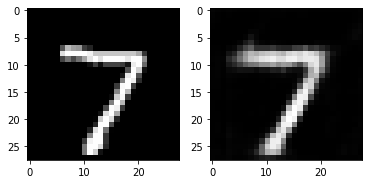

In [ ]:
h = encoder.predict(tf.expand_dims(x_test_mnist[0], axis=0))
img = decoder.predict(h)

plt.subplot(121)
plt.imshow(x_test_mnist[0], cmap="gray")
plt.subplot(122)
plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
x_train = x_train_mnist / 255.0
x_test = x_test_mnist / 255.0
y_train_mnist = keras.utils.to_categorical(y_train_mnist, 10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, 10)

In [ ]:
enc_input = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(enc_input)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Flatten()(x)
hidden_output = layers.Dense(8, activation="linear")(x)
x = layers.Dense(7* 7 * 8, activation="relu")(hidden_output)
x = keras.layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation="relu", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, 5, strides=(2, 2), activation="linear", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
dec_output = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)


x2 = layers.Dense(128, activation="relu")(hidden_output)
class_output = layers.Dense(10, activation="softmax")(x2)

In [ ]:
model = keras.Model(enc_input, [dec_output, class_output])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 26, 26, 32)   320         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 13, 13, 32)  0           ['conv2d_6[0][0]']               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 11, 11, 64)   18496       ['max_pooling2d_6[0][0]']        
                                                                                            

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[keras.metrics.CategoricalAccuracy()])

model.fit(x_train, [x_train, y_train_mnist], epochs=1)

1875/1875 [==============================] - 11s 5ms/step - loss: 0.2209 - conv2d_transpose_5_loss: 0.0450 - dense_9_loss: 0.1759 - conv2d_transpose_5_categorical_accuracy: 0.2139 - dense_9_categorical_accuracy: 0.9463


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255
x_test = x_test / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Игрушечный Res Net

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
block_2_output = layers.add([x, block_1_output])
x = layers.Conv2D(64, 3, activation='relu', padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding="same")(x)
block_3_output = layers.add([x, block_2_output])
x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
output= layers.Dense(10, activation="softmax")(x)


In [ ]:
model = keras.Model(inputs, output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2)

print(model.evaluate(x_test, y_test))

Epoch 1/15
625/625 [==============================] - 7s 9ms/step - loss: 1.7850 - accuracy: 0.3096 - val_loss: 1.5272 - val_accuracy: 0.4261
Epoch 2/15
625/625 [==============================] - 6s 9ms/step - loss: 1.3629 - accuracy: 0.4959 - val_loss: 1.1889 - val_accuracy: 0.5603
Epoch 3/15
625/625 [==============================] - 6s 9ms/step - loss: 1.1102 - accuracy: 0.5981 - val_loss: 0.9973 - val_accuracy: 0.6370
Epoch 4/15
625/625 [==============================] - 6s 9ms/step - loss: 0.9705 - accuracy: 0.6525 - val_loss: 0.9380 - val_accuracy: 0.6668
Epoch 5/15
625/625 [==============================] - 6s 9ms/step - loss: 0.8730 - accuracy: 0.6890 - val_loss: 0.8513 - val_accuracy: 0.6963
Epoch 6/15
625/625 [==============================] - 6s 9ms/step - loss: 0.8084 - accuracy: 0.7132 - val_loss: 0.7650 - val_accuracy: 0.7258
Epoch 7/15
625/625 [==============================] - 6s 9ms/step - loss: 0.7413 - accuracy: 0.7376 - val_loss: 0.7296 - val_accuracy: 0.7400
Epoch 

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(monitor="loss", min_delta=0.5, patience=1, verbose=1),
    keras.callbacks.ModelCheckpoint(filepath="model_{epoch}", save_best_only=True, monitor="loss", verbose=1)
    ]

In [ ]:
model = keras.Model(inputs, output)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=callbacks)

print(model.evaluate(x_test, y_test))

Epoch 1/15
620/625 [============================>.] - ETA: 0s - loss: 0.3766 - accuracy: 0.8692
Epoch 1: loss improved from inf to 0.37746, saving model to model_1
625/625 [==============================] - 9s 13ms/step - loss: 0.3775 - accuracy: 0.8688 - val_loss: 0.6397 - val_accuracy: 0.7873
Epoch 2/15
621/625 [============================>.] - ETA: 0s - loss: 0.3479 - accuracy: 0.8771
Epoch 2: loss improved from 0.37746 to 0.34824, saving model to model_2
625/625 [==============================] - 7s 11ms/step - loss: 0.3482 - accuracy: 0.8769 - val_loss: 0.6674 - val_accuracy: 0.7867
Epoch 2: early stopping
313/313 [==============================] - 1s 4ms/step - loss: 0.7092 - accuracy: 0.7820
[0.7091937065124512, 0.7820000052452087]


In [ ]:
# Сохранение
keras.models.save_model(model, "my_model")
# Сохранение
keras.models.save_model(model, "my_model.h5")

In [ ]:
def myloss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true, y_pred))

In [ ]:
model.compile(optimizer="adam", loss=myloss, metrics=["accuracy"])